In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

In [ ]:
np.random.seed(42)
num_customers = 1000   # Total customers 1000
customer_ids = np.arange(1001, 1001 + num_customers)   # Customer IDs
genders = np.random.choice(['Male', 'Female'], size=num_customers)  # Gender
ages = np.random.randint(18, 71, size=num_customers)  # Age between 18 and 70
service_lengths = np.random.randint(1, 51, size=num_customers)   # Service length in months
contract_types = np.random.choice(['Month-to-Month', 'One-Year', 'Two-Year'], size=num_customers)   # Contract type
monthly_charges = np.random.uniform(20, 120, size=num_customers)   # Monthly charges between 20 and 120 USD
total_charges = service_lengths * monthly_charges    # Calculate total charges based on service length and monthly charges
churn_options = ['Yes', 'No']  # Churn
churn = np.random.choice(churn_options, size=num_customers, p=[0.3, 0.7])

# Create a DataFrame
data = pd.DataFrame({
    'CustomerID': customer_ids,
    'Gender': genders,
    'Age': ages,
    'ServiceLength': service_lengths,
    'ContractType': contract_types,
    'MonthlyCharges': monthly_charges,
    'TotalCharges': total_charges,
    'Churn': churn
})

# Save the generated data to a CSV file
data.to_csv('CommLink_Telecom_Customer_Data.csv', index=False)

In [ ]:
data.head(10)

,CustomerID,Gender,Age,ServiceLength,ContractType,MonthlyCharges,TotalCharges,Churn
0,1001,Male,34,20,Month-to-Month,30.125991,602.519829,No
1,1002,Female,26,49,Month-to-Month,104.713949,5130.983499,No
2,1003,Male,50,42,One-Year,73.108534,3070.558449,No
3,1004,Male,70,35,One-Year,104.172336,3646.031766,Yes
4,1005,Male,37,50,Two-Year,78.022152,3901.107594,No
5,1006,Female,30,18,Two-Year,75.968844,1367.439201,No
6,1007,Male,45,17,Month-to-Month,30.525919,518.940615,No
7,1008,Male,65,24,Two-Year,36.735973,881.663360,No
8,1009,Male,46,3,Month-to-Month,117.202526,351.607577,No
9,1010,Female,30,32,Month-to-Month,42.848675,1371.157590,No


In [ ]:
data.isna().sum()   # No missing values

CustomerID        0
Gender            0
Age               0
ServiceLength     0
ContractType      0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

<Axes: >

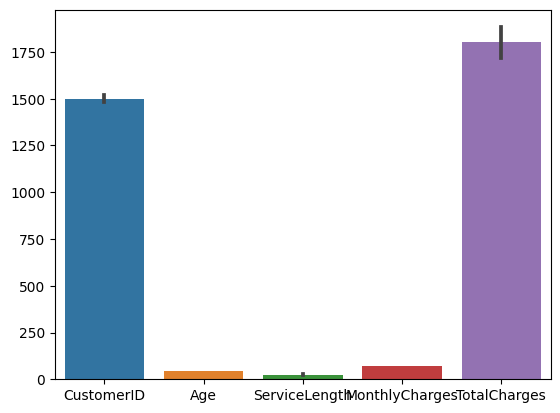

In [ ]:
sns.barplot(data)   # No outliers

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      1000 non-null   int64  
 1   Gender          1000 non-null   object 
 2   Age             1000 non-null   int64  
 3   ServiceLength   1000 non-null   int64  
 4   ContractType    1000 non-null   object 
 5   MonthlyCharges  1000 non-null   float64
 6   TotalCharges    1000 non-null   float64
 7   Churn           1000 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [ ]:
# Convert ServiceLength and TotalCharges columns to integer data type
data['MonthlyCharges'] = data['MonthlyCharges'].astype(int)
data['TotalCharges'] = data['TotalCharges'].astype(int)

In [ ]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['ContractType'] = label_encoder.fit_transform(data['ContractType'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      1000 non-null   int64 
 1   Gender          1000 non-null   int64 
 2   Age             1000 non-null   int64 
 3   ServiceLength   1000 non-null   int64 
 4   ContractType    1000 non-null   int64 
 5   MonthlyCharges  1000 non-null   int64 
 6   TotalCharges    1000 non-null   int64 
 7   Churn           1000 non-null   object
dtypes: int64(7), object(1)
memory usage: 62.6+ KB


In [ ]:
data.head()

,CustomerID,Gender,Age,ServiceLength,ContractType,MonthlyCharges,TotalCharges,Churn
0,1001,1,34,20,0,30,602,No
1,1002,0,26,49,0,104,5130,No
2,1003,1,50,42,1,73,3070,No
3,1004,1,70,35,1,104,3646,Yes
4,1005,1,37,50,2,78,3901,No


In [ ]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Columns to scale
numerical_columns = ['Age', 'ServiceLength', 'MonthlyCharges', 'TotalCharges']

# Scale the numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

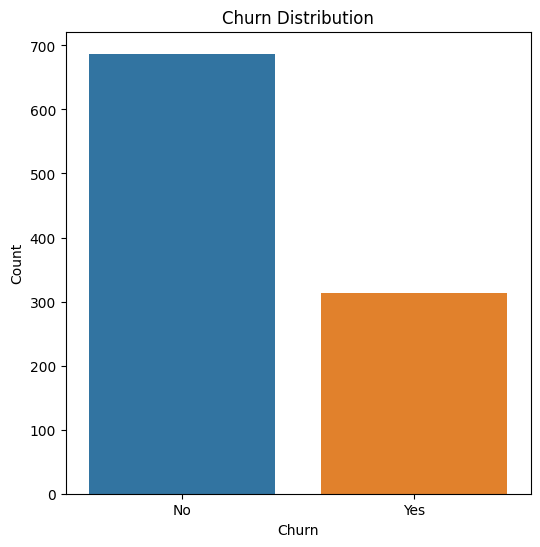

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='Churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

#Churn vs. Categorical Variables

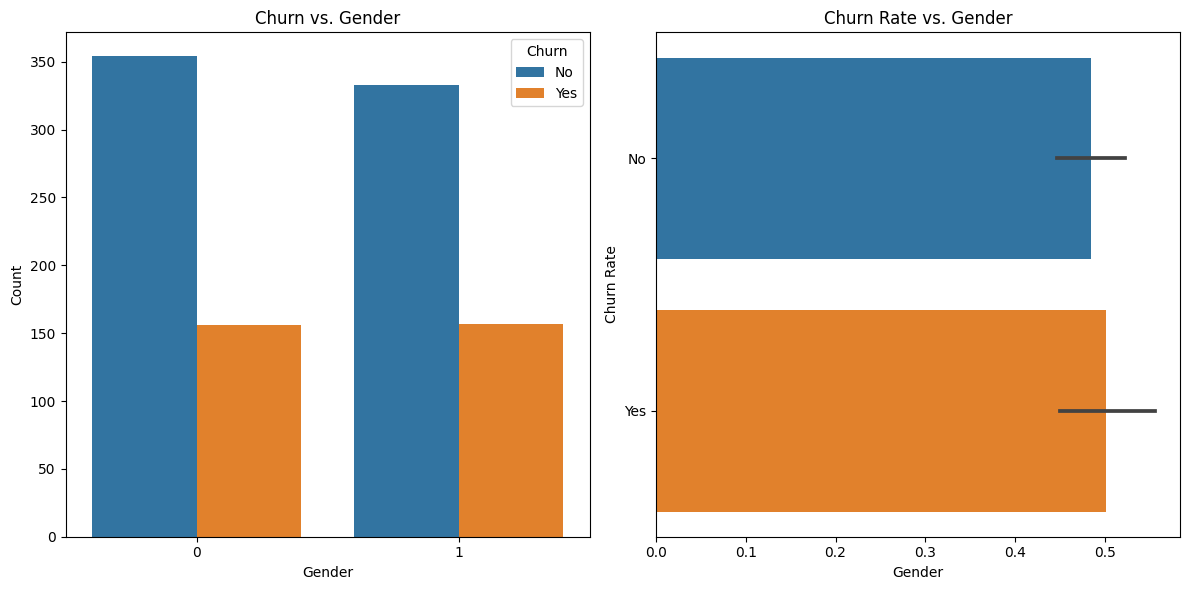

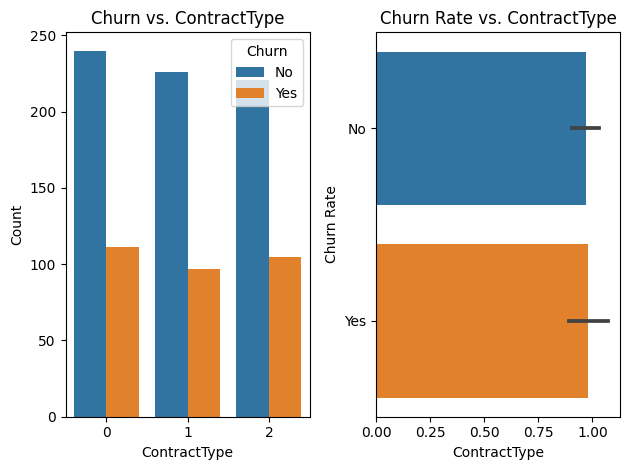

In [ ]:
plt.figure(figsize=(12, 6))
for col in ['Gender', 'ContractType']:
    plt.subplot(1, 2, 1)
    sns.countplot(data=data, x=col, hue='Churn')
    plt.title(f'Churn vs. {col}')
    plt.ylabel('Count')
    plt.subplot(1, 2, 2)
    sns.barplot(data=data, x=col, y='Churn', estimator=lambda x: sum(x) / len(x))
    plt.title(f'Churn Rate vs. {col}')
    plt.ylabel('Churn Rate')
    plt.tight_layout()
    plt.show()


#Churn vs. Numerical Variables:

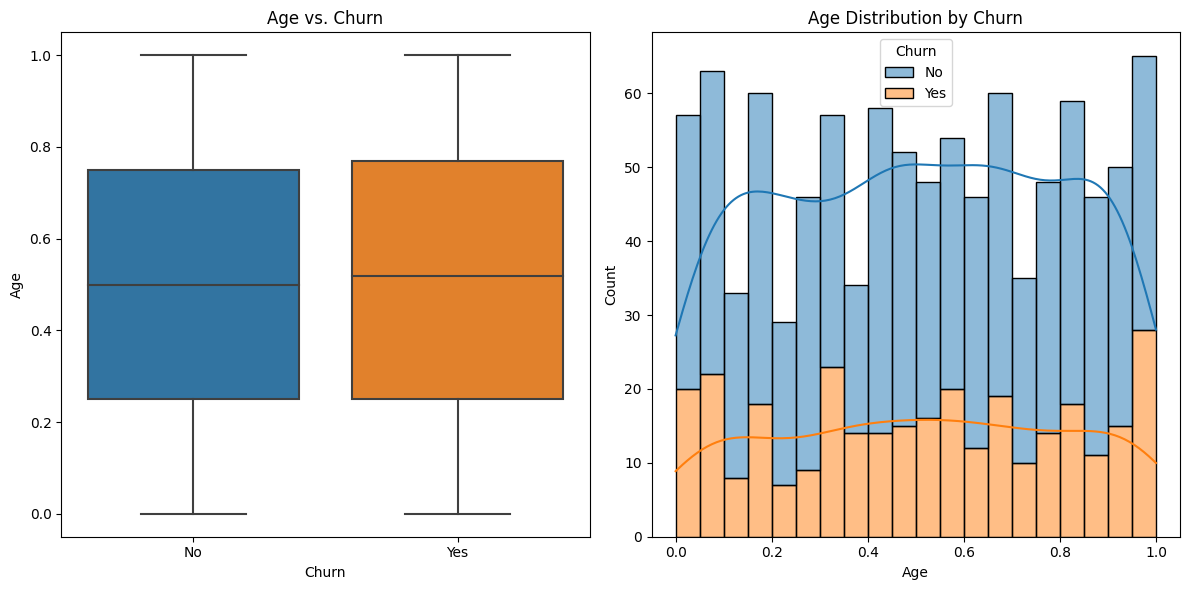

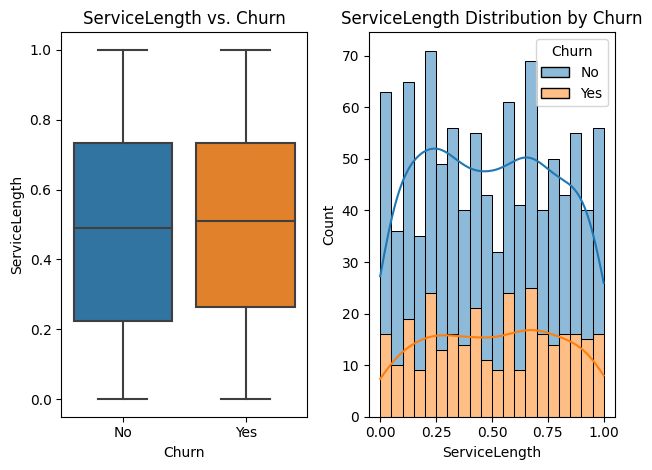

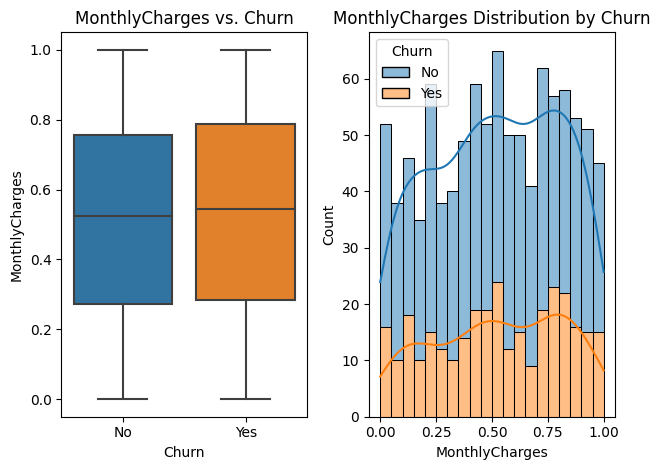

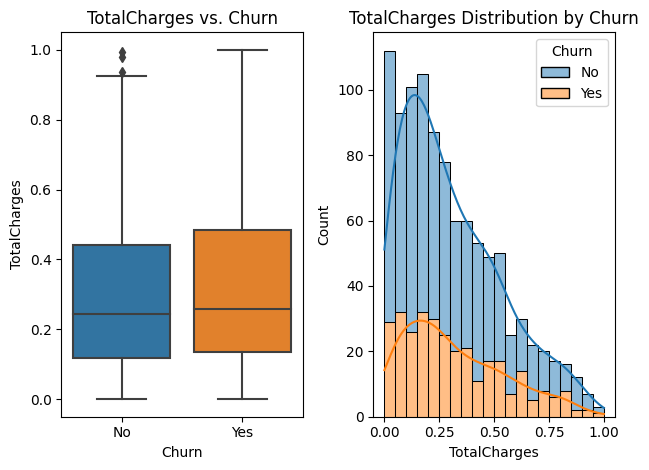

In [ ]:
plt.figure(figsize=(12, 6))
for col in ['Age', 'ServiceLength', 'MonthlyCharges', 'TotalCharges']:
    plt.subplot(1, 2, 1)
    sns.boxplot(data=data, x='Churn', y=col)
    plt.title(f'{col} vs. Churn')
    plt.subplot(1, 2, 2)
    sns.histplot(data=data, x=col, hue='Churn', multiple='stack', bins=20, kde=True)
    plt.title(f'{col} Distribution by Churn')
    plt.tight_layout()
    plt.show()


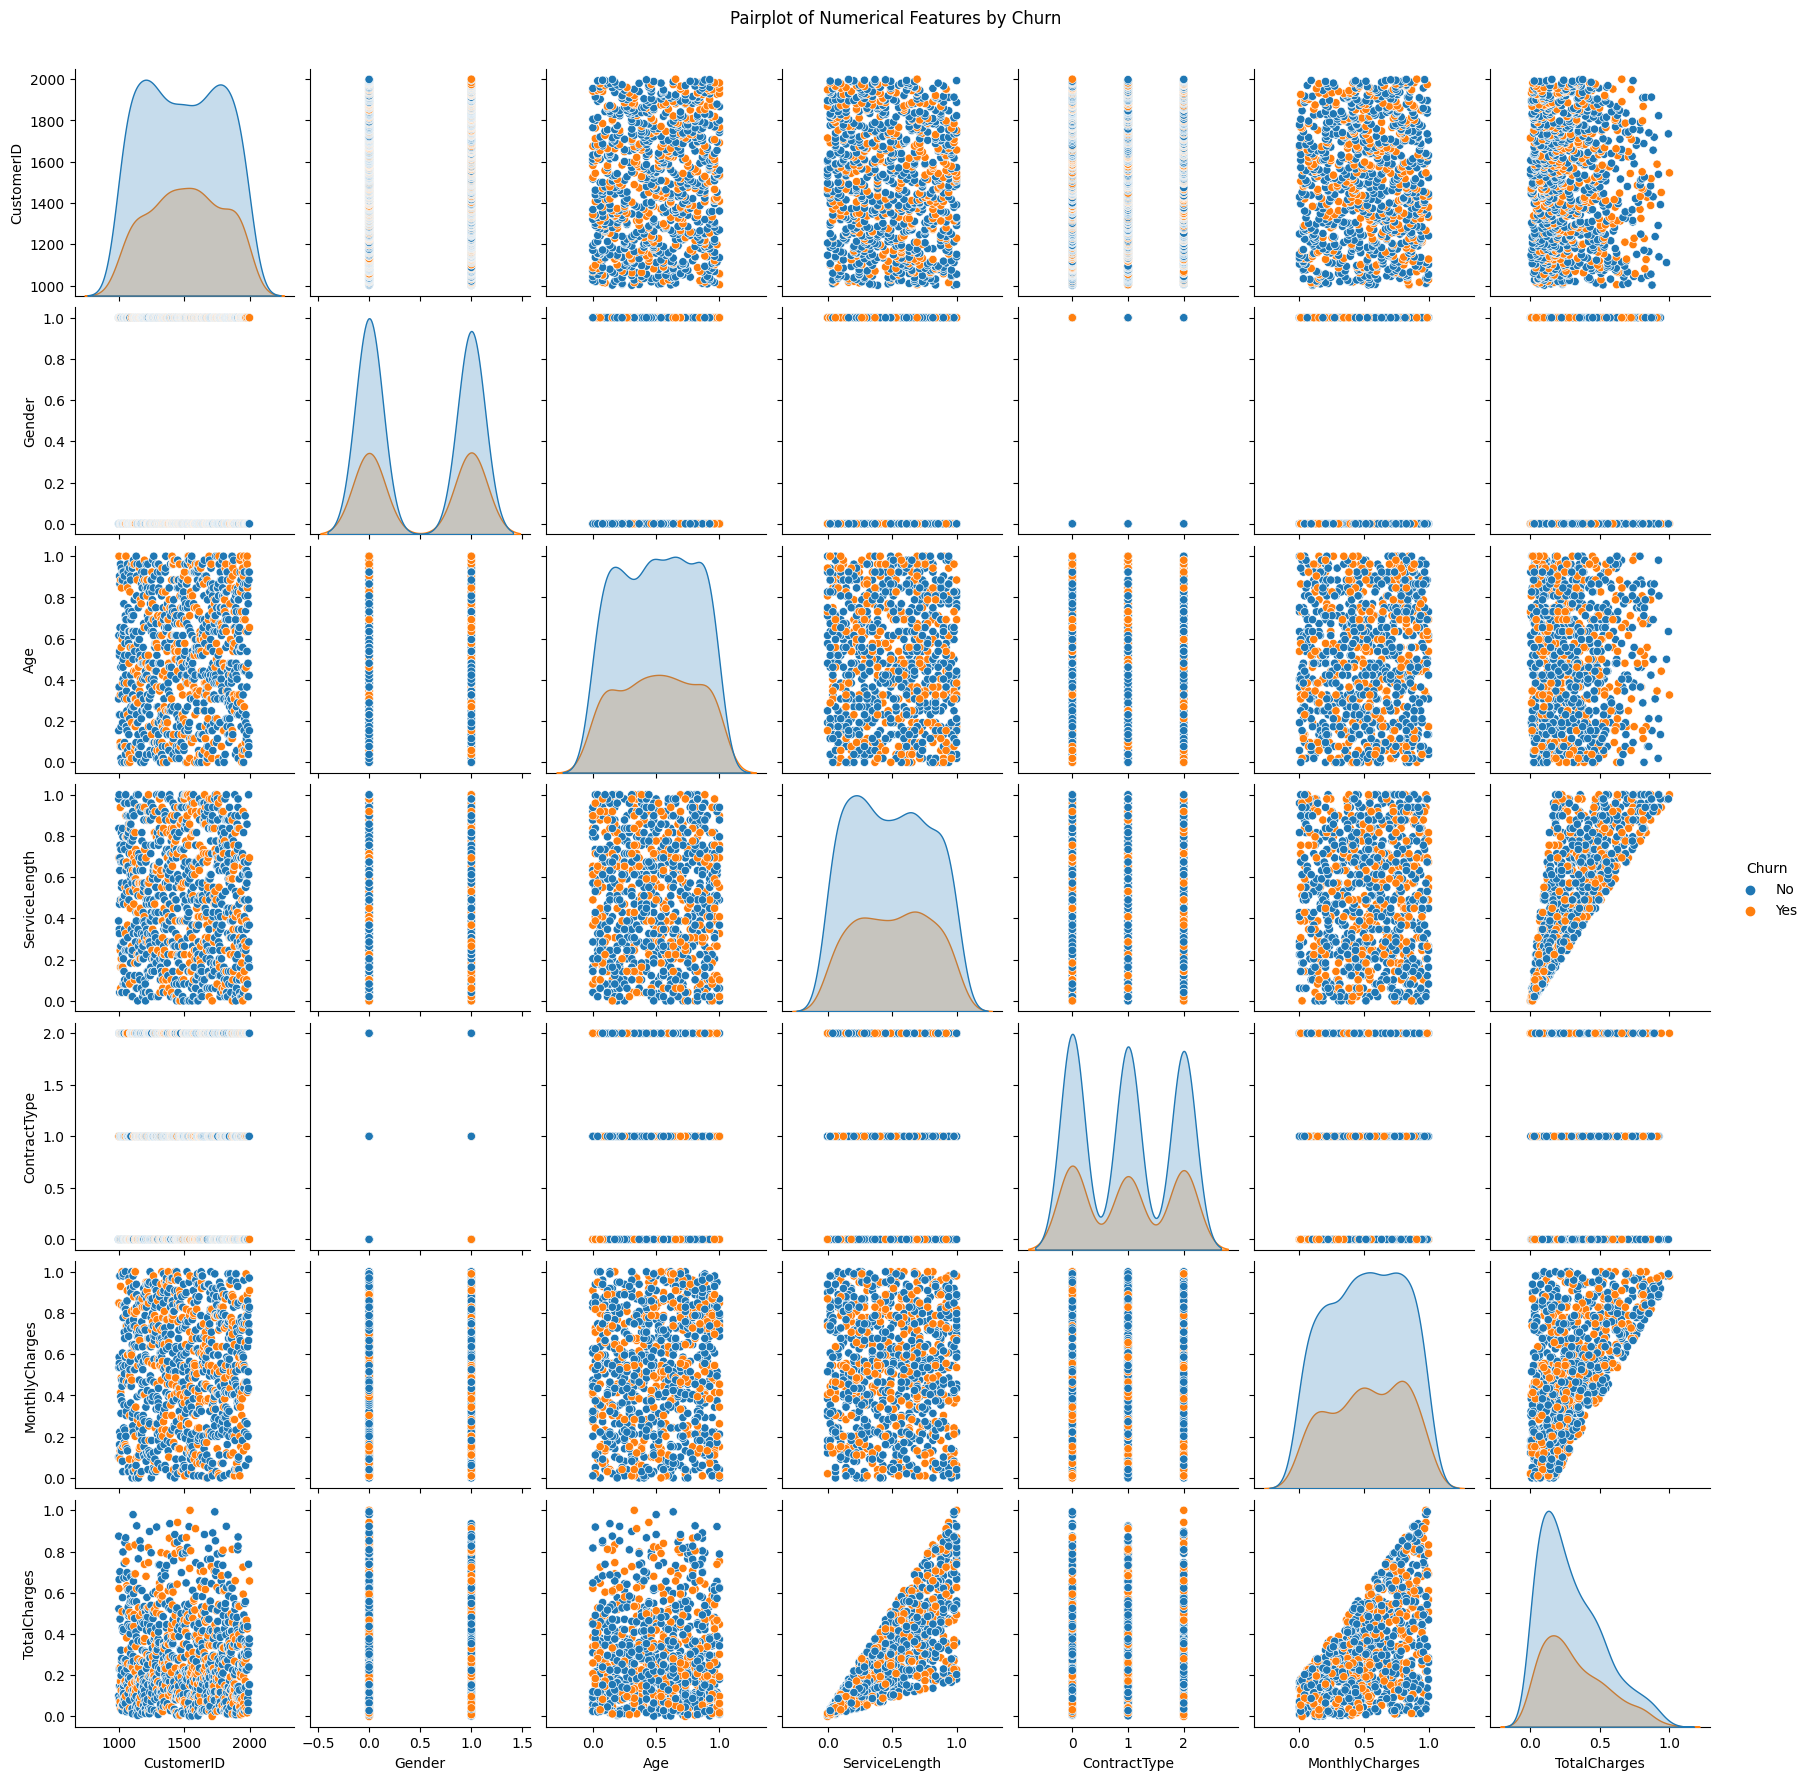

In [ ]:
sns.pairplot(data=data, hue='Churn', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Churn', y=1.02)
plt.show()

In [ ]:
X = data.drop(['CustomerID', 'Churn'], axis=1)
y = data['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

LR_Prediction

In [ ]:
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression Accuracy: {lr_accuracy:.2f}')
print(confusion_matrix(y_test, lr_predictions))

Logistic Regression Accuracy: 0.70
[[141   0]
 [ 59   0]]


RF_Prediction

In [ ]:
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')
print(confusion_matrix(y_test, rf_predictions))

Random Forest Accuracy: 0.65
[[121  20]
 [ 51   8]]


In [24]:
pickle.dump(lr_model, open("lr_model.pkl", "wb"))